# Installation Guide

Install CCDPApy package into google colab

In [ ]:
"""
Installation code for private respository
"""
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

import os

# Path to CCDPApy
# _ccdpapy_dir = '/content/drive/MyDrive/Yudai Fukae/Three CLs/CCDPApy-master'
_ccdpapy_dir = '/content/drive/MyDrive/Work/Undergrad Research/Yudai Fukae/Three CLs/CCDPApy-master' #for YAL

os.chdir(_ccdpapy_dir)
print(os.getcwd())

In [ ]:
"""
Installation code for public respository
"""
# # Mount drive
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# # Create folders for CCDPApy Tutorial
# _ccdpapy_tutorial_dir = '/content/drive/MyDrive/CCDPApy_Tutorial'
# if os.path.exists(_ccdpapy_tutorial_dir) == False:
#   os.mkdir(_ccdpapy_tutorial_dir)
# os.chdir(_ccdpapy_tutorial_dir)

# # clone git respository
# ! git clone https://github.com/lu000285/CCDPApy.git

# # cd into package folder
# _ccdpapy_dir = '/content/drive/MyDrive/CCDPApy_Tutorial/CCDPApy'
# os.chdir(_ccdpapy_dir)
# print(os.getcwd())

# Step-by-step to create BioProcess object for one manufacturing run


## 1. Input manufacturing data

Put files into "input_files" folder using the given template file

### ___BioProcess(file_name, measurement_sheet, feed_sheet, spc_list, new_spc_list)___
 <br>
Create BioProcess object to store bioprocess data and execute bioprocess.<br>
When the object is created, pre-process is done; run time (day, hrs) and cell culture volume before/after sampling are calculated.

Parameters
----------
    file_name : str
        Excel file name of measured data.
        Please include extension, '.xlsx'
    measurement_sheet : str default='Measuerd Data', optional
        Excel sheet name of meaured data.
    feed_sheet : str, default='Separate Feed Info', optional
        Excel sheet name of separate feed information.
    spc_list : list of str, default=[], optional
        List of species name to be analyzed, which must be in the default spcies list.
        Upper, lower, or capitalized case can be uesd. If this is not specified,
        the following default species list is to be used.
        default_spc_list = ['Alanine',   'Arginine', 'Asparagine','Aspartate', 'Cystine', 'Glucose', 'Glutamine', 'Glutamate', 'Glycine', 'Histidine', 'Isoleucine', 'Lactate', 'Leucine', 'Lysine', 'Methionine', 'NH3', 'Phenylalanine', 'Proline', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valine', 'Ethanolamine']
    new_spc_list : list of str, default=[], optional
        List of new species name to be analuzed, which must not be listed in the original species list.

In [1]:
from CCDPApy.BioProcess.BioProcess import BioProcess

input_file = 'CL1_1.xlsx'
measurement_sheet = 'Measured Data'
feed_sheet = 'Separate Feed Info'
spc = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']

bio_process = BioProcess(file_name=input_file,
                         #measurement_sheet=measurement_sheet,
                         #feed_sheet=feed_sheet,
                         spc_list=spc,
                         #new_spc_list=['new']
                         )

CL1_1.xlsx imported.


## 2. In Process

### ___BioProcess.inprocess(use_feed_conc, use_conc_after_feed)___ method<br>
Calculate cumulative consumptions/productions for species.<br>

Parameters:
----------
    use_feed_conc : bool, default=False, optional 
        must be True if feed concentrations are to be used to calculate cumulative consumptions/productions.
    use_conc_after_feed : bool, default=False, optional
        must be True if concentrations after feeding are to be used to calculate cumulative consumptions/productions.


In [2]:
bio_process.inprocess(use_feed_conc=True, use_conc_after_feed=False)

## 3. Post Process

### 3.1 Two-Point Calculations

#### ___BioProcess.two_pt_calc()___ method<br>
Calculate SP. rate for species using Two-Point Calculation.<br>

In [3]:
bio_process.two_pt_calc()

### 3.2 Polynomial Regression

#### ___BioProcess.poly_regression(polyorder_file)___ method<br>
Calculate SP. rate for species using Polynomial Regression.<br>

Parameters:
----------
    polyorder_file : str, default=None, optional
        an Excel file of polynomial orders for species.<br>
        if this argument is None, the order of 3 is to be used for all species.

In [4]:
poly_file = 'polynomial_order_1.xlsx'
bio_process.poly_regression(polyorder_file=poly_file)

### 3.3 Rolling Polynomial Regression

#### ___BioProcess.roll_regression(order, windows)___ method<br>
Calculate SP. rate for species using Rolling Polynomial Regression.<br>

Parameters:
----------
    order : int, default=3, optional
        polynomial order for the rolling polynomial regression.
    windows : int, default=6, optional
        data point size that is to be used for the regression.


In [5]:
order = 3
window = 6
bio_process.roll_regression(order=order, windows=window)

## 4. Plotting

### ___BioProcess.plot(spc_list, profile, method, viability, combined, file_name)___ method<br>
Plot data profiles for species and return the figure.

Parameters
----------
    spc_list : str, list of str
        species name to plot
    profile : str, list of str
        profiles to plot
        pass 'all', 'conc', 'cumulative', 'sp rate'.
    method : str, list of str
        methods to plot SP. rate.
        pass 'all', 'twopt', 'polyreg', 'rollreg'
    viability : bool, default=False, optional
    combined : bool, default=False, optional
    file_name : str : default=None, optional
Returns
-------
    fig : matplotlib.pyplot.figure

### 4.1 Concentration Profiles

['CELL', 'GLUCOSE']
{'concentration': True, 'cumulative': False, 'sp_rate': False}
{'twopt': False, 'polyreg': False, 'rollreg': False}


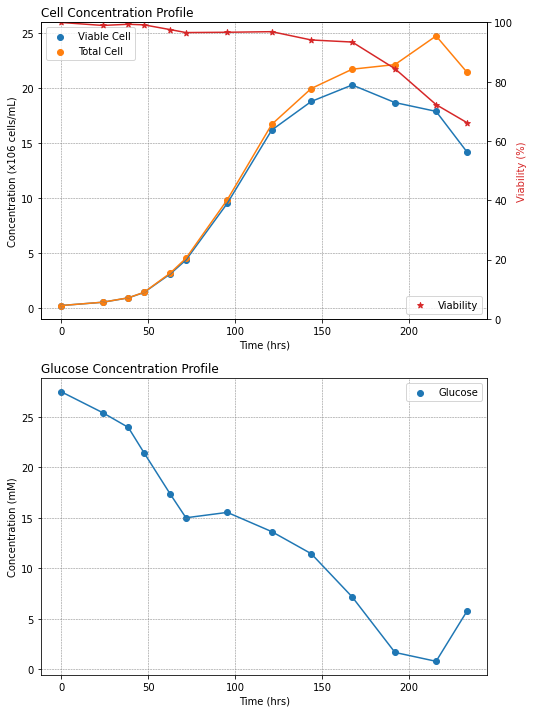

In [7]:
plot_list = ['cell', 'Glucose']
profile = 'conc'
fig = bio_process.plot(spc_list=plot_list, profile=profile, viability=True)

### 4.2 Cumulative Profiles

['CELL', 'IGG', 'GLUCOSE']
{'concentration': False, 'cumulative': True, 'sp_rate': False}
{'twopt': False, 'polyreg': False, 'rollreg': False}


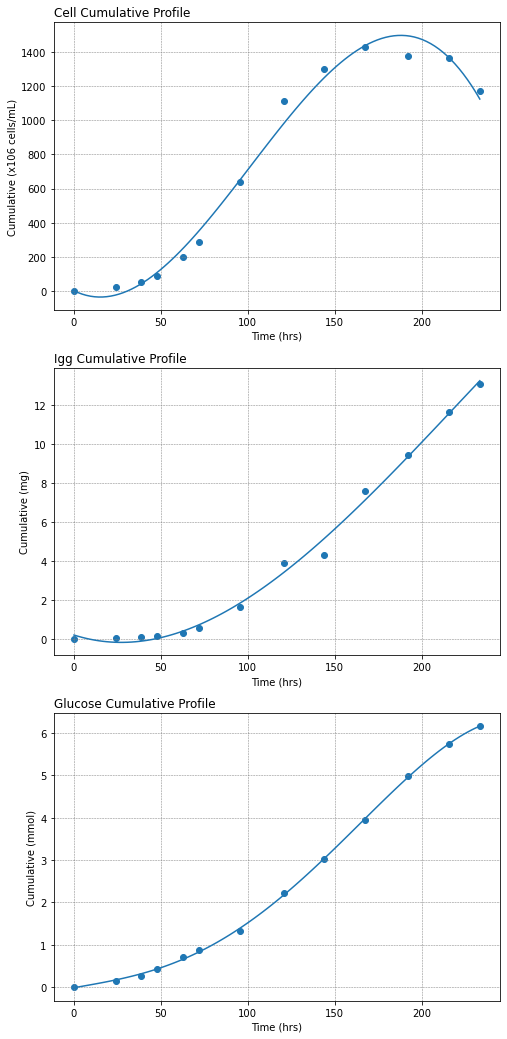

In [8]:
plot_list = ['cell', 'IgG', 'glucose']
profile = 'cumulative'
fig = bio_process.plot(spc_list=plot_list, profile=profile, viability=True)

### 4.3 SP. Rate Profiles

#### 4.3.1 Two-Point Calculation.

['GLUCOSE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': True, 'polyreg': False, 'rollreg': False}


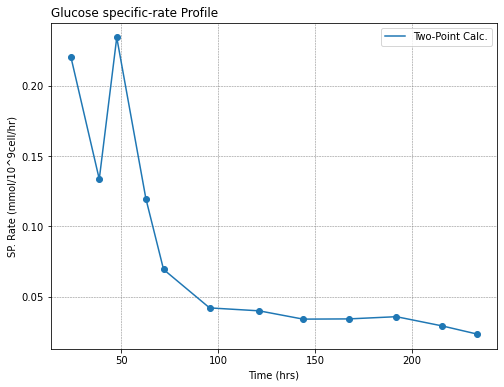

In [9]:
plot_list = 'glucose'
profile = 'sp rate'
method = 'twopt'
fig = bio_process.plot(spc_list=plot_list, profile=profile, method=method)

#### 4.3.2 Polynomial Regression.

['GLUCOSE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': False, 'polyreg': True, 'rollreg': False}


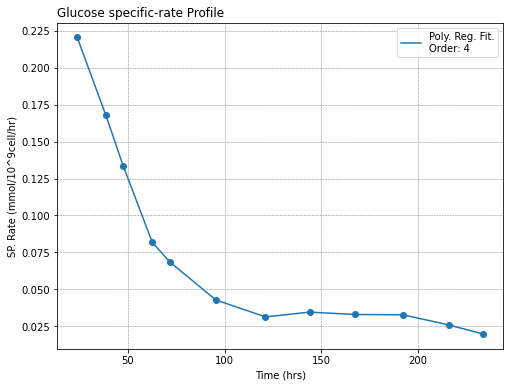

In [10]:
plot_list = 'glucose'
profile = 'sp rate'
method = 'polyreg'
fig = bio_process.plot(spc_list=plot_list, profile=profile, method=method)

#### 4.3.3 Rolling Regression.

['GLUCOSE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': False, 'polyreg': False, 'rollreg': True}


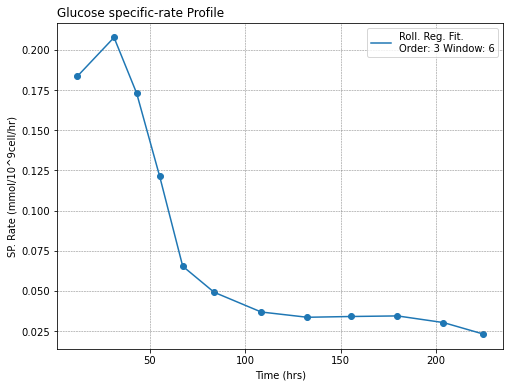

In [11]:
plot_list = 'glucose'
profile = 'sp rate'
method = 'rollreg'
fig = bio_process.plot(spc_list=plot_list, profile=profile, method=method)

#### 4.3.4 Multiple Methods

['GLUCOSE']
{'concentration': False, 'cumulative': False, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


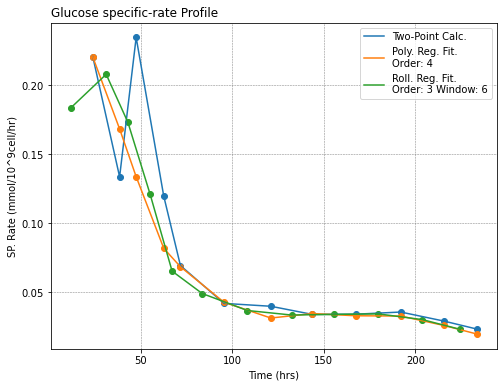

In [13]:
plot_list = 'glucose'
profile = 'sp rate'
method = ['twopt', 'polyreg', 'rollreg']
fig = bio_process.plot(spc_list=plot_list, profile=profile, method=method)

### 4.4 Mutiple Profiles

['GLUCOSE', 'GLUTAMINE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


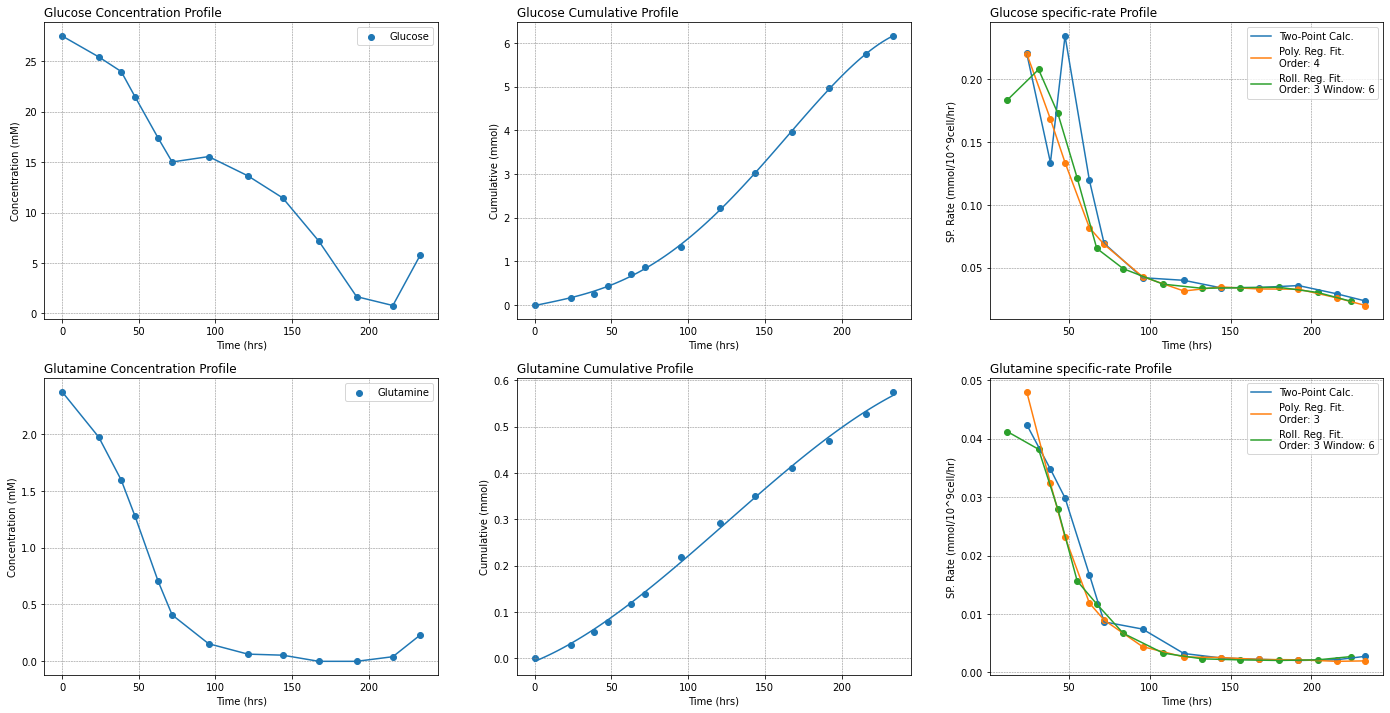

In [17]:
plot_list = ['glucose', 'glutamine']
profile = ['all']
method = ['all']
fig = bio_process.plot(spc_list=plot_list, profile=profile, method=method)

## 5. Displaying

### ___BioProcess.disp_data(exp_info, process, spc)___ method

Display data.<br>
Display the experiment information, pre-processed data, in-processed data, and post-processed data.

Parameters
----------
    exp_info : bool
        pass true to display experiment information.
    process : str, list of str, default=[None], optional
        process name.
        use 'conc' for concentration data,
        'prepro' for pre-processed data,
        'inpro' for in-processed data,
        'twopt' for two-point calculation,
        'polyreg' for polynomial regression,
        'rollreg' for rolling polynomial regression.
    spc : str, list of str, default=[None], optional
        species name.
        use 'cell', 'oxygen', 'igg' or 'product', 'metabolite'.

### 5.1 Displaying Experimant Infomation

In [18]:
bio_process.disp_data(exp_info=True)


************ Experiment Information ************
Cell Line:              Sample CL1
Experiment ID:          Sample CL1_1
Experimenter Name:      CL1_1
Initial Culture Volume: 74.0 (mL)
Separate Feed List:
['GLUTAMINE']
Metabolite List:
['GLUCOSE', 'LACTATE', 'GLUTAMINE', 'ASPARAGINE', 'ASPARTATE']


### 5.2 Displaying Pre-Processed data

In [19]:
bio_process.disp_data(exp_info=True, process='prepro')


************ Experiment Information ************
Cell Line:              Sample CL1
Experiment ID:          Sample CL1_1
Experimenter Name:      CL1_1
Initial Culture Volume: 74.0 (mL)
Separate Feed List:
['GLUTAMINE']
Metabolite List:
['GLUCOSE', 'LACTATE', 'GLUTAMINE', 'ASPARAGINE', 'ASPARTATE']
************ Pre Process Data ************
    RUN TIME (DAYS)  RUN TIME (HOURS)  VOLUME BEFORE SAMPLING (mL)  \
0          0.000000          0.000000                    74.000000   
1          0.995139         23.883333                    73.000000   
2          1.606250         38.550000                    71.500000   
3          1.982639         47.583333                    70.000000   
4          2.610417         62.650000                    68.500000   
5          2.989583         71.750000                    67.000000   
6          3.980556         95.533333                    67.137500   
7          5.045833        121.100000                    67.934813   
8          5.993056        

### 5.3 Displaying In-Processed data

In [21]:
bio_process.disp_data(exp_info=False, process='inpro', spc='metabolite')

************ Metabolite In Process Data ************
    CUM GLUCOSE (mmol)  CUM LACTATE (mmol)  CUM GLUTAMINE (mmol)  \
0             0.000000           -0.000000              0.000000   
1             0.151536            0.213943              0.029116   
2             0.255331            0.497035              0.056135   
3             0.430951            0.640273              0.078502   
4             0.711053            1.133966              0.117673   
5             0.869542            1.301878              0.137448   
6             1.333046            1.393756              0.219291   
7             2.214421            1.367322              0.290783   
8             3.013392            1.300326              0.349151   
9             3.950865            1.421234              0.410770   
10            4.980034            1.607786              0.469779   
11            5.745724            1.405544              0.526846   
12            6.155640            1.142233              0.57504

### 5.4 Displaying Post-Processed data

#### 5.4.1 Two-Point Calculation

In [22]:
spc_lst = ['cell', 'oxygen', 'igg']
bio_process.disp_data(exp_info=False, process='twopt', spc=spc_lst)


************ Cell Post Process Data -Two Point Calc. ************
    SP. GROWTH RATE, m (hr-1) [mv-kd]        mv        kd
0                                 NaN       NaN       NaN
1                            0.031456  0.032038  0.000582
2                            0.036621  0.036640  0.000018
3                            0.045775  0.046322  0.000547
4                            0.049121  0.051020  0.001899
5                            0.037388  0.039671  0.002283
6                            0.032023  0.033088  0.001065
7                            0.021490  0.022117  0.000627
8                            0.008038  0.009770  0.001731
9                            0.004712  0.005364  0.000652
10                          -0.001938  0.002455  0.004393
11                          -0.000394  0.007878  0.008273
12                          -0.011030 -0.008806  0.002224

************ Oxygen Post Process Data -Two Point Calc. ************
    SP. OUR (mmol/109 cells/hr)  SP. OXYGEN CONSUMPT

#### 5.4.2 Polynomial Regression

In [23]:
bio_process.disp_data(exp_info=False, process='polyreg', spc='metabolite')

************ Metabolite Post Process Data -Poly. Reg. ************
    Poly. Reg. Order: 4 qGlucose (mmol/109 cell/hr)  \
0                                               NaN   
1                                          0.220353   
2                                          0.168203   
3                                          0.133660   
4                                          0.081834   
5                                          0.068506   
6                                          0.042846   
7                                          0.031429   
8                                          0.034656   
9                                          0.033060   
10                                         0.032854   
11                                         0.026037   
12                                         0.019885   

    Poly. Reg. Order: 5 qLactate (mmol/109 cell/hr)  \
0                                               NaN   
1                                          0.517870 

#### 5.4.3 Rolling Regression

In [24]:
bio_process.disp_data(exp_info=False, process='rollreg', spc='metabolite')

************ Metabolite Post Process Data -Roll. Poly. Reg. ************
   Roll. Poly. Reg DL/DG (mmol/mmol) Roll. Poly. Reg qGln/qGlc (mmol/mmol)
0                           1.640405                              0.224471
1                           1.724938                              0.183767
2                           1.612492                               0.16182
3                           1.470809                               0.12885
4                            0.98389                              0.179103
5                           0.239679                              0.136034
6                          -0.079941                              0.089633
7                          -0.032293                               0.06925
8                           0.128832                              0.063115
9                           0.128644                              0.059593
10                         -0.132612                              0.071119
11                         

## 6. Saving as an Excel File

### ___BioProcess.save_excel(file_name)___ method

Save the bioprocess data as an Excel file.<br>
Please include '.xlsx'.<br>
The output does not include rolling regression data. To save the rolling regression data, use ___BioProcess.save_excel_rollreg___" method.<br>

Parameters
----------
file_name : str
    File name.
    Please include '.xlsx'.

In [25]:
bio_process.save_excel(file_name='test.xlsx')

test.xlsx Saved.



### ___save_excel_rollreg(file_name)___ method

Save rolling regression data as an Excel file.<br>
Please include '.xlsx'.<br>
The output does not include other bioprocess data. To save other data,
use ___BioProcess.save_excel___.<br>

Parameters
----------
file_name : str
    File name.
    Please include '.xlsx'.

In [27]:
bio_process.save_excel_rollreg(file_name='rollreg.xlsx')

rollreg.xlsx Saving......
rollreg.xlsx Saved.



# Step 1 to 3 by one function to create BioProcess object for one manufacturing run

## ___bioprocess_pipeline(input_file_name, measurement_sheet, feed_sheet, **kwargs)___ function 
Execute the bioprocess;<br>
in-process, two-point calculations, polynomial regression, rolling polynomial regression.

Parameters
----------
input_file : str
    The Excel file of the measured data.
    '.xlsx' must be included in the file name.

measurement_sheet : str
    Sheet name of the measured data in the Excel file.

feed_sheet : str
    Sheet name of the separate feed infomation in the Excel file.

Returns
-------
bio_process : python object
    Bioprocess object.

Other Parameters
----------------
**kwargs : bio_process properties, optional
    Properties:
    spc_list:  list of str. default=['Alanine', 'Arginine', 'Asparagine', 'Aspartate', 'Cystine', 'Glucose', 'Glutamine', 'Glutamate', 'Glycine', 'Histidine', 'Isoleucine', 'Lactate', 'Leucine','Lysine', 'Methonine', 'NH3', 'PHENYLALANINE', 'PROLINE', 'SERINE', 'THREONINE','TRYPTOPHAN', 'TYROSINE', 'VALINE', 'ETHANOLAMINE']
        List of species name to be analyzed.
        Upper, lower, or capitalized case can be uesd. If this is not specified,
        original species list is to be used.

    new_spc:  list of str.
        List of new species name to be analuzed, which is not listed in the original species list.

    use_feed_conc: bool, default=False
        True if the measured data has the measurements of feed concentrations. Otherwise, False.

    use_conc_after_feed: bool, default=False
        True if the measured data has the measurements of concentrations after feeding. Otherwiese, False.

    all_method: bool
        True if all regression methods are required.

    polyreg:  bool
        True if polynomial regression is needed.

    polyorder_file: string, default='polynomial_order.xlsx'.
        Name of the file, whihc includes species name and the polynomial order for each species.
        '.xlsx' must be included in the file name. The default polynomial order of 3 is to be used, if this is not specified.

    rollreg: bool
        True if rolling polynomial regression is needed.

    rollreg_order: int, default=3
        The polynomial order for the regression.

    rollreg_window: int, default=6
        The window size for the regression.

In [ ]:
from CCDPApy import bioprocess_pipeline

input_file = 'CL1_1.xlsx'
measurement_sheet = 'Measured Data'
feed_sheet = 'Separate Feed Info'
key = {'use_feed_conc': True,
       'use_conc_after_feed': False,
       'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
       'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
       'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
        }

bio_process = bioprocess_pipeline(input_file_name=input_file,
                                  measurement_sheet=measurement_sheet,
                                  feed_sheet=feed_sheet,
                                  **key
                                  )

# CellLine class to store and aggregate data for mutiple manufacturing runs in different Cell Line.

## ___CellLine___ Class
Store BioProcess objects for data aggregation.

In [ ]:
from CCDPApy import CellLine

cell_line = CellLine()

## ___CellLine.add_bio_process___ method

Parameters
----------
    bio_process : python object
    BioProcess object

In [ ]:
cell_line.add_bio_process(bio_process=bio_process)

## ___CellLine.disp_cell_lines()___ method

Display Cell Line Name and Experiment ID stored in CellLine Class.

In [ ]:
cell_line.disp_cell_lines()

## ___CellLine.get_cell_line(cl_name)___ method

Return dictionary of BioProcess object stored in CellLine class.

Returns
-------
    python dictionary
        {'cell line name': BioProcess object}


In [ ]:
cell_line.get_cell_line(cl_name='CL_1')

# Tutorial For Cell Line 1

Cell Line 1 has __3 differnet experiments__.<br>
Cell Line 1 has __feed concentrations__ but no measurements of __concentrations after feeding__.
__Glutamine__ feed is added in Cell Line 1.

In [ ]:
from CCDPApy import CellLine    # used to aggregate all cell lines and experiments data
from CCDPApy import bioprocess_pipeline # used for data process of one experiment

data_file_1 = ['CL1_1.xlsx', 'CL1_2.xlsx', 'CL1_3.xlsx']
measurement_sheet = 'Measured Data'
feed_sheet = 'Separate Feed Info'
key_cl1 = {'use_feed_conc': True,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }

cell_line = CellLine()

for input in data_file_1:
    cl_1 = bioprocess_pipeline(input_file_name=input,
                               measurement_sheet=measurement_sheet,
                               feed_sheet=feed_sheet,
                               **key_cl1)
    cell_line.add_bio_process(bio_process=cl_1)

In [ ]:
cell_line.disp_cell_lines()

# Tutorial For Cell Line 2

Cell Line 2 has __3 experiments__.<br>
Cell Line 2 has measurements of __concentrations after feeding__ but does't have __feed concentraions__.<br>
__Glucose__ feed is added in Cell Line 2.

In [ ]:
data_file_2 = ['CL2_1.xlsx', 'CL2_2.xlsx', 'CL2_3.xlsx']
measurement_sheet = 'Measured Data'
feed_sheet = 'Separate Feed Info'
key_cl2 = {'use_feed_conc': False,
           'use_conc_after_feed': True,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_2.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }
for input in data_file_2:
    cl_2 = bioprocess_pipeline(input_file_name=input,
                               measurement_sheet=measurement_sheet,
                               feed_sheet=feed_sheet,
                               **key_cl2)
    cell_line.add_bio_process(bio_process=cl_2)


In [ ]:
cell_line.disp_cell_lines()

# Tutorial For Cell Line 3

Cell Line 3 has __3 experiments__.<br>
Cell Line 3 doesn't have both measurements of __concentrations after feeding__ and __feed concentraions__.<br>
For __glucose__, Cell Line 3 has the __calculated cumulative profile__ in Measured Data.<br>
__Glutamine__ feed is added in Cell Line 3.

In [ ]:
data_file_3 = ['CL3_1.xlsx', 'CL3_2.xlsx', 'CL3_3.xlsx']
measurement_sheet = 'Measured Data'
feed_sheet = 'Separate Feed Info'
key_cl3 = {'use_feed_conc': False,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'all_method': True
           }

for input in data_file_3:
    cl_3 = bioprocess_pipeline(input_file_name=input,
                               measurement_sheet=measurement_sheet,
                               feed_sheet=feed_sheet,
                               **key_cl3)
    cell_line.add_bio_process(bio_process=cl_3)

In [ ]:
cell_line.disp_cell_lines()

# Plotting

## One Experiment

### Each plot for each species

In [ ]:
cell_line.disp_cell_lines()

In [ ]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
cl1_dict = cell_line.get_cell_line(cl_name='Sample CL1')
exp2 = cl1_dict['Sample CL1_1']
fig = exp2.plot(spc_list=plot_list, profile='all', method='all')

### Multiple species on the same plot

In [ ]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
cl1_dict = cell_line.get_cell_line(cl_name='Sample CL1')
exp3 = cl1_dict['Sample CL1_3']
fig = exp3.plot(spc_list=plot_list, profile='all', method='polyreg', combined=True)

## Different Experiments in One Cell Line

### ___CellLine.plot_exps(cell_line, spc_list, method, exp_list, legend,file_name)___ method

Plot different experiments in a cell line on the same figure.<br>

Parameters
----------
    cell_line : str
        Cell line name to plot experiments.
    spc_list :  llist of str
        Spcies name list to plot the profiles.
    method :default='all', optional
        Method to plot specific rates for species.
        'all' for all methods, 
        'towpt' for two-point calcuations, 
        'polyreg' for polynomial regression,
        'rollreg' for rolling polynomial regression.
    exp_list : default=None, optional
        List Experience ID to plot. 
    legend : default=True, optional
        When True, legends are plotted on the figure.
    file_name : default=None, optional
        File name to save the plot.

In [ ]:
cell_line.disp_cell_lines()

In [ ]:
plot_list = plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']

method = 'twopt' # default='all', 'polyreg', 'twopt', 'rollreg' 
exp_lst = ['Sample CL2_2', 'Sample CL2_3']
file_name = 'Sample CL2'

fig = cell_line.plot_exps(cell_line='Sample CL2',
                          spc_list=plot_list,
                          method=method,
                          #exp_list=exp_lst,
                          #file_name=file_name
                          )

# Data Aggregation

In [ ]:
cell_line.disp_cell_lines()

## Different Cell Lines and Their Experiments

### ____CellLine.plot_cell_lines()____ method

Plot different cell lines and experiments on the same figure.

Parameters
----------
    spc_list :  llist of str
        Spcies name list to plot the profiles.
    compare_cell_line : bool
        When True, experiments of the same cell line are colored in the same color.
    method : list of str default='all', optional
        Method to plot specific rates for species.
        'all' for all methods, 
        'towpt' for two-point calcuations, 
        'polyreg' for polynomial regression,
        'rollreg' for rolling polynomial regression.
    cell_line_list : list of str, default=None, optional
    estimator : str default=None, optional
    legend : default=True, optional
        When True, legends are plotted on the figure.
    file_name : default=None, optional
        File name to save the plot.


Compare Differend Cell Lines

In [ ]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
method = 'polyreg' # default='all', 'polyreg', 'twopt', 'rollreg' 
cell_line_list = ['Sample CL2','Sample CL3']
file_name = 'polyreg'
fig = cell_line.plot_cell_lines(spc_list=plot_list,
                                compare_cell_line=True,
                                method=method,
                                #cell_line_list=cell_line_list,
                                #file_name=file_name
                                )

Compare different experiments in different cell lines

In [ ]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
method = 'polyreg' # default='all', 'polyreg', 'twopt', 'rollreg' 
cell_line_list = ['Sample CL2_2']
file_name = 'polyreg'
fig = cell_line.plot_cell_lines(spc_list=plot_list,
                                compare_cell_line=False,
                                #method=method,
                                #cell_line_list=cell_line_list,
                                #file_name=file_name
                                )

## Save Bioprocess Data as an Excel

### ___CellLine.save_excel(cell_line, file_name)____ method

Save each bioprocess data in the same cell line as an Excel file.<br>
Please include '.xlsx'.<br>
Do not include rolling regression data. To save the rolling regression data,
use save_excel_rollreg method. 

Parameters
----------
cell_line : str
    Cell Line name.
file_name : str
    File name.
    Please include '.xlsx'.

In [ ]:
cell_line.get_cell_line_list()

In [ ]:
cell_line.save_excel(cell_line='Sample CL1', file_name='cl_1')
cell_line.save_excel(cell_line='Sample CL2', file_name='cl_2')
cell_line.save_excel(cell_line='Sample CL3', file_name='cl_3')

## Save Rolling Regression Data as an Excel

### ___CellLine.save_excel_rollreg(cell_line, file_name)___ method

Save each rolling regression data in the same cell line as an Excel file.<br>
Please include '.xlsx'.<br>
Do not include other bioprocess data. To save other data,
use save_excel method.

Parameters
----------
cell_line : str
    Cell Line name.
file_name : str
    File name.
    Please include '.xlsx'.

In [ ]:
cell_line.save_excel_rollreg(cell_line='Sample CL1', file_name='cl_1_rollreg')
cell_line.save_excel_rollreg(cell_line='Sample CL2', file_name='cl_2_rollreg')
cell_line.save_excel_rollreg(cell_line='Sample CL3', file_name='cl_3_rollreg')